In [1]:
import librosa
import librosa.display

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import keras
print(keras.__version__)

from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

from keras.regularizers import l1
from keras.regularizers import l2

from keras.utils import to_categorical

from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import LeakyReLU

from keras.models import Sequential

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import itertools

2.4.3


In [2]:
# ref.: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
# Read data
melspectrogram = []
labels = []

for i in range(1,11):
    melspectrogram.append(np.load("UrbanSound8K/audio/fold/melspectrogram_fold"+str(i)+".npy"))
    labels.append(np.load("UrbanSound8K/audio/fold/labels_fold"+str(i)+".npy"))

Test, fold:  1
Train, fold:  [2, 3, 4, 5, 6, 7, 8, 9, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 124, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 62, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 62, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 63, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 62, 64)        18496     
________________________________________________________________

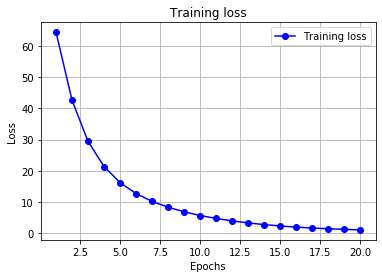

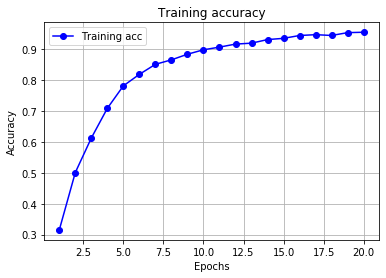


Test accurancy:
28/28 [==============================] - 10s 346ms/step - loss: 1.7317 - accuracy: 0.7125
 71.2485671043396 %

Normalized confusion matrix
[[0.46 0.   0.08 0.   0.01 0.29 0.   0.16 0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.   0.01 0.  ]
 [0.01 0.   0.09 0.86 0.01 0.   0.01 0.   0.02 0.  ]
 [0.14 0.   0.01 0.   0.6  0.07 0.03 0.13 0.02 0.  ]
 [0.08 0.   0.   0.   0.01 0.59 0.   0.   0.31 0.  ]
 [0.   0.   0.   0.06 0.09 0.   0.86 0.   0.   0.  ]
 [0.03 0.   0.   0.   0.38 0.04 0.01 0.51 0.03 0.  ]
 [0.   0.   0.01 0.   0.   0.   0.   0.   0.99 0.  ]
 [0.05 0.03 0.14 0.   0.03 0.01 0.   0.04 0.08 0.62]]
Test accuracy = 71.24856815578465
Test, fold:  2
Train, fold:  [1, 3, 4, 5, 6, 7, 8, 9, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
___

<Figure size 432x288 with 0 Axes>

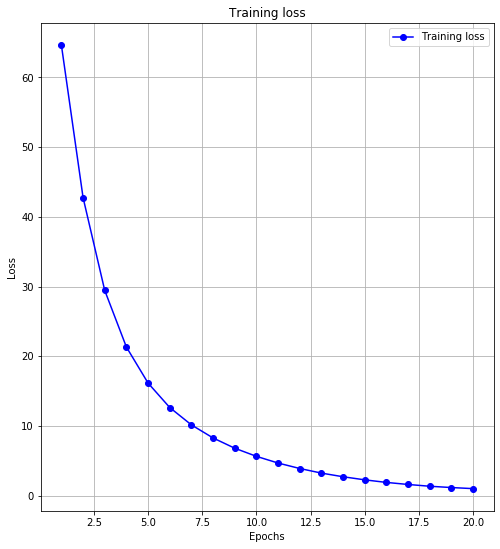

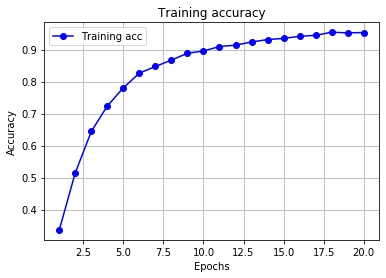


Test accurancy:
28/28 [==============================] - 10s 349ms/step - loss: 1.7845 - accuracy: 0.6802
 68.01801919937134 %

Normalized confusion matrix
[[0.23 0.01 0.   0.   0.25 0.28 0.   0.02 0.07 0.14]
 [0.   0.95 0.   0.   0.02 0.   0.   0.   0.   0.02]
 [0.02 0.   0.92 0.   0.   0.   0.   0.   0.   0.06]
 [0.   0.   0.02 0.96 0.02 0.   0.   0.   0.   0.  ]
 [0.01 0.   0.01 0.03 0.82 0.   0.   0.12 0.   0.01]
 [0.05 0.   0.1  0.04 0.01 0.51 0.   0.   0.1  0.19]
 [0.   0.   0.03 0.   0.03 0.   0.94 0.   0.   0.  ]
 [0.   0.   0.   0.01 0.11 0.01 0.   0.12 0.6  0.15]
 [0.01 0.   0.11 0.03 0.   0.   0.   0.   0.84 0.01]
 [0.   0.   0.02 0.   0.   0.   0.   0.   0.02 0.96]]
Test accuracy = 68.01801801801803
Test, fold:  3
Train, fold:  [1, 2, 4, 5, 6, 7, 8, 9, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
__

<Figure size 432x288 with 0 Axes>

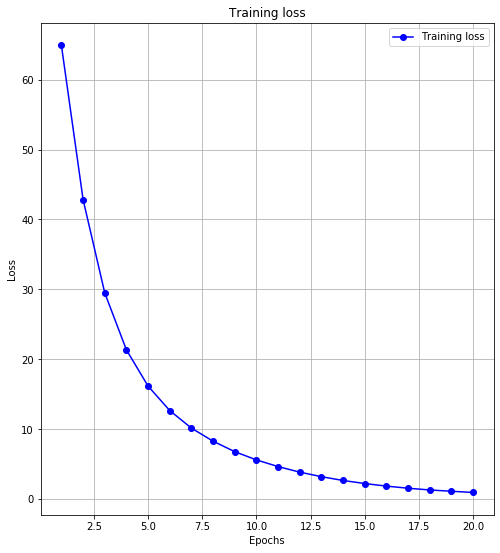

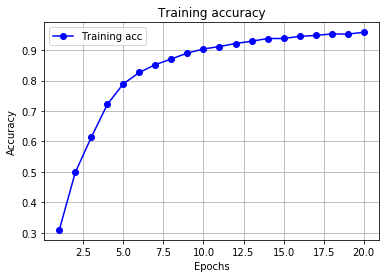


Test accurancy:
29/29 [==============================] - 10s 352ms/step - loss: 1.8945 - accuracy: 0.6724
 67.24324226379395 %

Normalized confusion matrix
[[0.49 0.   0.   0.   0.2  0.11 0.   0.   0.   0.2 ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.05 0.   0.79 0.03 0.   0.02 0.   0.   0.02 0.09]
 [0.01 0.   0.08 0.8  0.   0.02 0.   0.   0.05 0.04]
 [0.01 0.   0.   0.   0.75 0.1  0.   0.03 0.11 0.  ]
 [0.01 0.   0.01 0.01 0.06 0.36 0.   0.52 0.01 0.03]
 [0.   0.   0.   0.   0.   0.   0.97 0.03 0.   0.  ]
 [0.04 0.   0.   0.   0.57 0.13 0.   0.25 0.   0.  ]
 [0.02 0.   0.   0.   0.   0.03 0.   0.   0.89 0.07]
 [0.05 0.   0.05 0.   0.01 0.   0.   0.01 0.01 0.87]]
Test accuracy = 67.24324324324324
Test, fold:  4
Train, fold:  [1, 2, 3, 5, 6, 7, 8, 9, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
__

<Figure size 432x288 with 0 Axes>

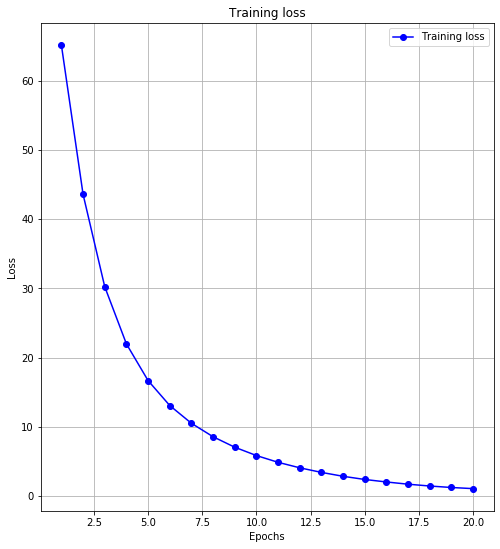

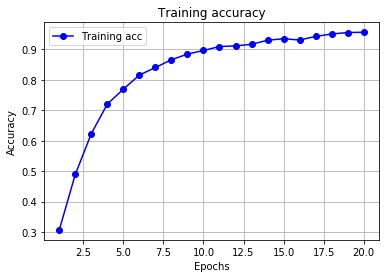


Test accurancy:
31/31 [==============================] - 11s 368ms/step - loss: 1.6527 - accuracy: 0.7556
 75.55555701255798 %

Normalized confusion matrix
[[0.35 0.   0.01 0.   0.01 0.06 0.   0.56 0.   0.01]
 [0.   0.59 0.   0.   0.07 0.03 0.   0.12 0.   0.19]
 [0.   0.   0.62 0.   0.05 0.01 0.   0.   0.   0.32]
 [0.01 0.   0.02 0.85 0.02 0.04 0.   0.06 0.   0.  ]
 [0.02 0.   0.   0.01 0.67 0.   0.   0.23 0.   0.07]
 [0.01 0.   0.02 0.   0.03 0.76 0.   0.19 0.   0.  ]
 [0.   0.03 0.   0.03 0.03 0.   0.87 0.05 0.   0.  ]
 [0.   0.   0.   0.   0.   0.06 0.   0.88 0.   0.07]
 [0.02 0.   0.   0.03 0.   0.   0.01 0.   0.92 0.03]
 [0.   0.   0.02 0.   0.01 0.03 0.   0.   0.01 0.93]]
Test accuracy = 75.55555555555556
Test, fold:  5
Train, fold:  [1, 2, 3, 4, 6, 7, 8, 9, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
__

<Figure size 432x288 with 0 Axes>

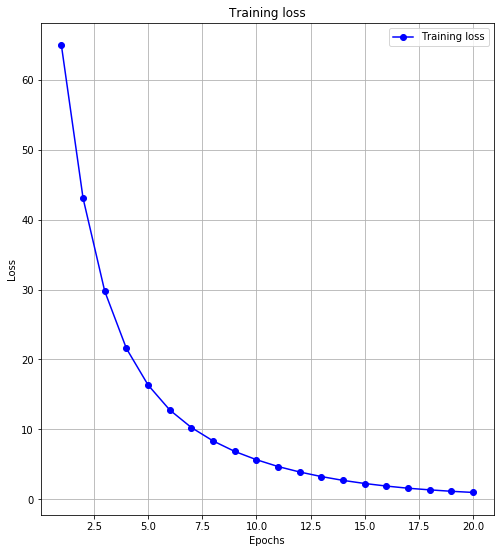

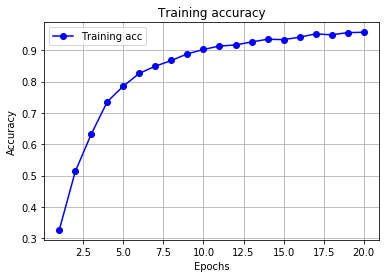


Test accurancy:
30/30 [==============================] - 10s 342ms/step - loss: 1.3438 - accuracy: 0.8440
 84.40170884132385 %

Normalized confusion matrix
[[0.62 0.   0.02 0.   0.   0.36 0.   0.   0.   0.  ]
 [0.01 0.91 0.   0.   0.03 0.01 0.   0.   0.   0.04]
 [0.   0.   0.89 0.   0.07 0.02 0.01 0.   0.   0.01]
 [0.03 0.01 0.15 0.71 0.03 0.02 0.03 0.01 0.01 0.  ]
 [0.03 0.   0.   0.   0.89 0.01 0.   0.07 0.   0.  ]
 [0.08 0.   0.02 0.   0.03 0.67 0.   0.2  0.   0.  ]
 [0.   0.   0.   0.   0.03 0.   0.97 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.03 0.07 0.01 0.   0.   0.   0.   0.89 0.  ]
 [0.01 0.01 0.01 0.   0.01 0.   0.   0.   0.   0.96]]
Test accuracy = 84.4017094017094
Test, fold:  6
Train, fold:  [1, 2, 3, 4, 5, 7, 8, 9, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
___

<Figure size 432x288 with 0 Axes>

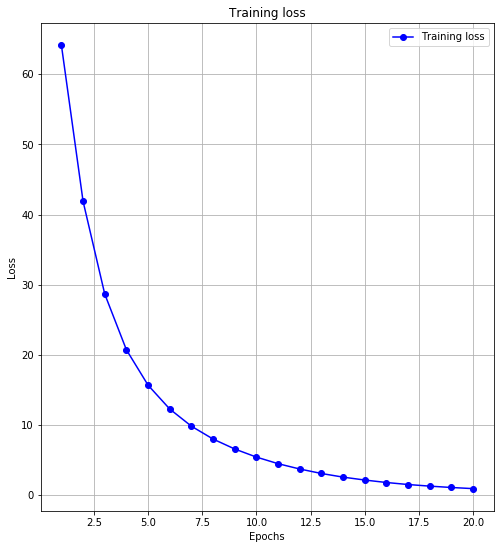

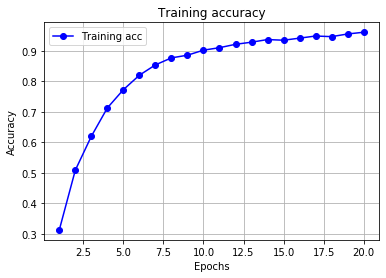


Test accurancy:
26/26 [==============================] - 9s 344ms/step - loss: 1.6342 - accuracy: 0.7303
 73.02551865577698 %

Normalized confusion matrix
[[0.57 0.   0.   0.01 0.05 0.02 0.   0.   0.02 0.33]
 [0.   0.89 0.   0.04 0.04 0.   0.   0.04 0.   0.  ]
 [0.11 0.   0.66 0.15 0.04 0.   0.01 0.   0.   0.03]
 [0.02 0.   0.   0.94 0.01 0.   0.   0.   0.   0.03]
 [0.   0.   0.   0.01 0.97 0.   0.   0.   0.02 0.  ]
 [0.38 0.   0.01 0.01 0.01 0.39 0.   0.17 0.02 0.01]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.26 0.   0.   0.   0.16 0.   0.   0.57 0.   0.  ]
 [0.11 0.   0.03 0.07 0.01 0.01 0.   0.   0.77 0.  ]
 [0.04 0.01 0.09 0.01 0.03 0.04 0.   0.   0.   0.78]]
Test accuracy = 73.0255164034022
Test, fold:  7
Train, fold:  [1, 2, 3, 4, 5, 6, 8, 9, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
____

<Figure size 432x288 with 0 Axes>

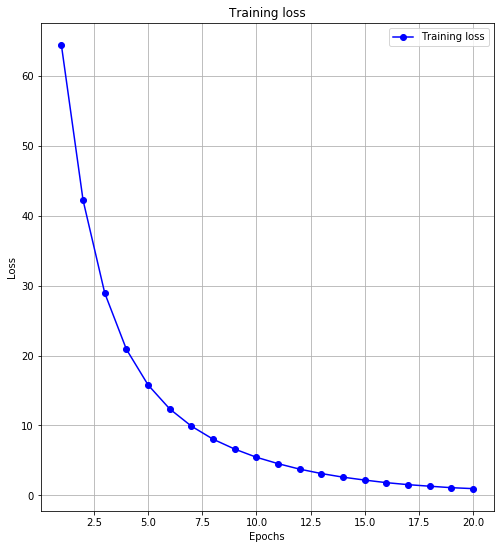

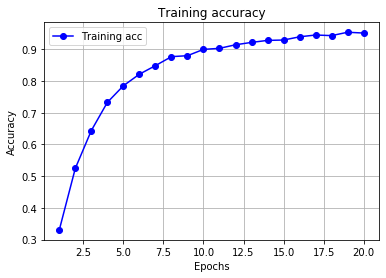


Test accurancy:
27/27 [==============================] - 9s 339ms/step - loss: 1.8634 - accuracy: 0.6826
 68.25775504112244 %

Normalized confusion matrix
[[0.96 0.   0.   0.   0.01 0.   0.01 0.02 0.   0.  ]
 [0.04 0.75 0.   0.   0.   0.   0.   0.   0.   0.21]
 [0.15 0.   0.53 0.03 0.   0.   0.   0.01 0.02 0.26]
 [0.04 0.   0.01 0.89 0.01 0.   0.   0.   0.02 0.03]
 [0.11 0.   0.   0.   0.87 0.   0.   0.   0.   0.02]
 [0.25 0.03 0.02 0.04 0.04 0.38 0.   0.1  0.04 0.1 ]
 [0.18 0.   0.   0.06 0.02 0.   0.75 0.   0.   0.  ]
 [0.47 0.   0.   0.   0.46 0.   0.   0.07 0.   0.  ]
 [0.08 0.   0.   0.05 0.06 0.03 0.   0.   0.61 0.17]
 [0.01 0.   0.02 0.   0.01 0.   0.   0.   0.   0.96]]
Test accuracy = 68.25775656324582
Test, fold:  8
Train, fold:  [1, 2, 3, 4, 5, 6, 7, 9, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
___

<Figure size 432x288 with 0 Axes>

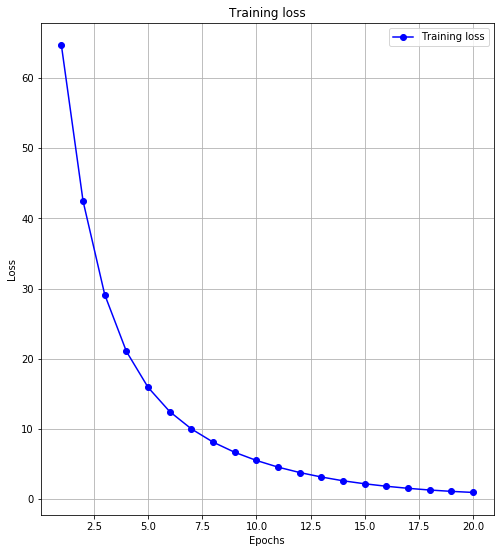

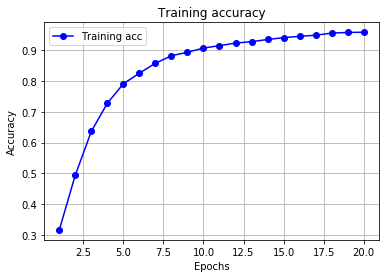


Test accurancy:
26/26 [==============================] - 9s 338ms/step - loss: 1.7523 - accuracy: 0.7246
 72.45657444000244 %

Normalized confusion matrix
[[0.34 0.05 0.3  0.   0.3  0.   0.   0.   0.   0.01]
 [0.   0.77 0.03 0.17 0.   0.03 0.   0.   0.   0.  ]
 [0.01 0.   0.81 0.01 0.   0.08 0.   0.01 0.06 0.02]
 [0.   0.   0.03 0.89 0.01 0.   0.   0.   0.06 0.01]
 [0.   0.   0.   0.   0.75 0.   0.02 0.18 0.05 0.  ]
 [0.   0.   0.03 0.01 0.   0.78 0.01 0.16 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.04 0.   0.   0.   0.03 0.03 0.   0.91 0.   0.  ]
 [0.   0.   0.   0.   0.4  0.03 0.   0.   0.51 0.06]
 [0.   0.   0.12 0.06 0.   0.01 0.01 0.03 0.06 0.71]]
Test accuracy = 72.45657568238212
Test, fold:  9
Train, fold:  [1, 2, 3, 4, 5, 6, 7, 8, 10]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
___

<Figure size 432x288 with 0 Axes>

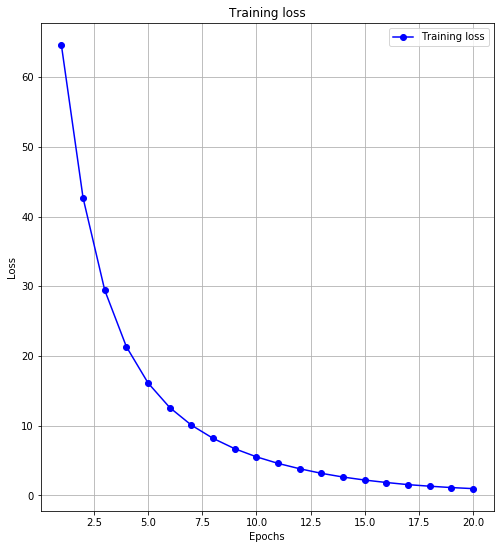

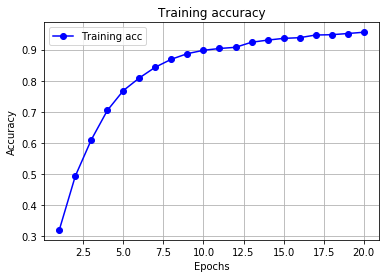


Test accurancy:
26/26 [==============================] - 9s 351ms/step - loss: 1.5851 - accuracy: 0.7880
 78.79902124404907 %

Normalized confusion matrix
[[0.45 0.   0.02 0.   0.03 0.26 0.   0.01 0.   0.23]
 [0.   0.81 0.   0.   0.   0.   0.   0.   0.   0.19]
 [0.   0.   0.92 0.01 0.   0.04 0.   0.01 0.02 0.  ]
 [0.06 0.01 0.1  0.74 0.05 0.02 0.   0.01 0.01 0.  ]
 [0.   0.   0.   0.   0.4  0.14 0.   0.46 0.   0.  ]
 [0.   0.   0.   0.   0.   0.94 0.   0.03 0.02 0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.98 0.   0.  ]
 [0.   0.   0.   0.   0.   0.02 0.   0.   0.95 0.02]
 [0.   0.   0.04 0.   0.   0.03 0.   0.   0.   0.93]]
Test accuracy = 78.79901960784314
Test, fold:  10
Train, fold:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 124, 32)      320       
___

<Figure size 432x288 with 0 Axes>

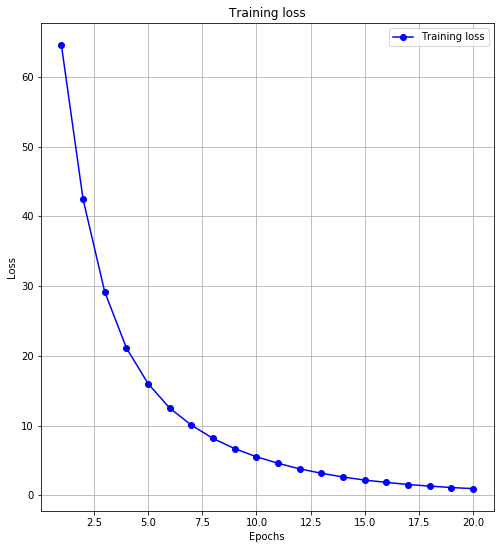

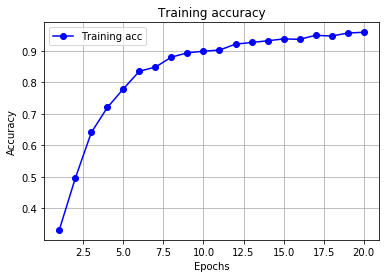


Test accurancy:
27/27 [==============================] - 9s 348ms/step - loss: 1.3199 - accuracy: 0.8017
 80.1672637462616 %

Normalized confusion matrix
[[0.83 0.   0.02 0.   0.1  0.   0.   0.05 0.   0.  ]
 [0.   0.97 0.   0.   0.   0.   0.   0.   0.   0.03]
 [0.03 0.   0.78 0.07 0.03 0.04 0.   0.   0.04 0.01]
 [0.   0.01 0.06 0.84 0.03 0.01 0.   0.01 0.   0.04]
 [0.   0.   0.04 0.   0.81 0.03 0.   0.08 0.   0.04]
 [0.16 0.   0.   0.   0.02 0.7  0.   0.12 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.02 0.   0.   0.97 0.   0.  ]
 [0.1  0.   0.11 0.18 0.01 0.01 0.01 0.   0.58 0.  ]
 [0.   0.   0.14 0.   0.06 0.   0.   0.   0.05 0.75]]
Test accuracy = 80.16726403823178


<Figure size 432x288 with 0 Axes>

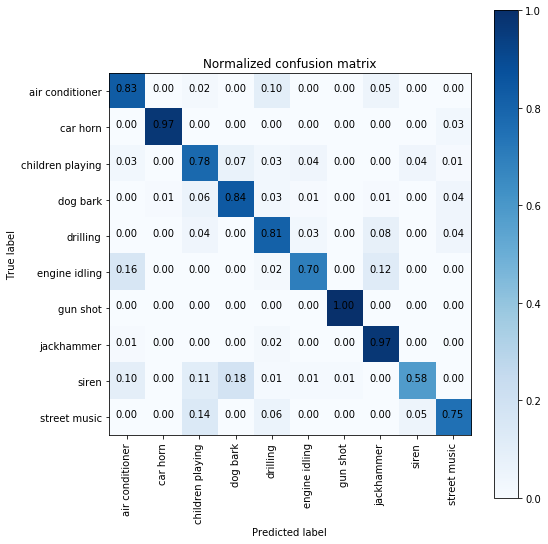

In [4]:
accurancy_fold = []

for fold_nmb in range(10):
    
    lr = 0.0001
    batch_size = 125
    epochs = 20

    fold = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    print('Test, fold: ', fold_nmb+1)
    fold.remove(fold_nmb+1)
    print('Train, fold: ', fold)
    
    melspectrogram_train = (melspectrogram[fold[0]-1], melspectrogram[fold[1]-1],
                            melspectrogram[fold[2]-1], melspectrogram[fold[3]-1], 
                            melspectrogram[fold[4]-1], melspectrogram[fold[5]-1], 
                            melspectrogram[fold[6]-1], melspectrogram[fold[7]-1],
                            melspectrogram[fold[8]-1])
    labels_train = (labels[fold[0]-1], labels[fold[1]-1], labels[fold[2]-1],
                    labels[fold[3]-1], labels[fold[4]-1], labels[fold[5]-1],
                    labels[fold[6]-1], labels[fold[7]-1], labels[fold[8]-1])

    melspectrogram_test = melspectrogram[fold_nmb]
    labels_test = labels[fold_nmb]
                        
    melspectrogram_train = np.concatenate(melspectrogram_train, axis=0)
    labels_train = np.concatenate(labels_train, axis=0)
    
    # ------------------------------------------------------------------------------------------------------
    
    mean = np.mean(melspectrogram_train, axis = 0)
    std = np.std(melspectrogram_train, axis = 0)

    X_train_stand_score = (melspectrogram_train-mean)/std
    X_test_stand_score = (melspectrogram[fold_nmb]-mean)/std
    
    # ------------------------------------------------------------------------------------------------------
    
    X_train = X_train_stand_score.reshape((X_train_stand_score.shape[0], X_train_stand_score.shape[1], X_train_stand_score.shape[2], 1))
    X_test = X_test_stand_score.reshape((X_test_stand_score.shape[0], X_test_stand_score.shape[1], X_test_stand_score.shape[2], 1))

    y_train = to_categorical(labels_train)
    y_test = to_categorical(labels_test)
    
    # ------------------------------------------------------------------------------------------------------
    # CNN24
    num_rows = X_train_stand_score.shape[1]
    num_columns = X_train_stand_score.shape[2]
    num_channels = 1
    num_labels = 10

    keras.backend.clear_session()
    
    model = models.Sequential()
    
    model.add(Conv2D(32, (3,3), input_shape = (num_rows,num_columns,num_channels))) 
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 

    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))       

    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(Conv2D(128, (3,3), padding='same'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  

    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(MaxPooling2D((2,2), strides=2))
    model.add(BatchNormalization())
    model.add(Activation('relu'))  

    model.add(Flatten())
          
    model.add(Dense(256,  kernel_regularizer=l2(0.1)))
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))

    model.add(Dense(256, kernel_regularizer=l2(0.1)))
    model.add(Activation('relu')) 
    model.add(Dropout(0.5))

    model.add(Dense(10,activation ='softmax'))
    
    model.summary()
    
    opt = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size = batch_size)
    
    history_dict = history.history
 
    acc = history.history['accuracy']
    loss = history.history['loss']

    epochs = range(1, len(acc) + 1)

    
    plt.clf()   # clear figure
    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

    plt.clf()   # clear figure
    acc_values = history_dict['accuracy']

    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.title('Training accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()
    
    print('')
    print('Test accurancy:')
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print('', 100*test_acc, '%')
    
    print('')
    y_pred = model.predict(X_test)

    classID = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    classes = ['air conditioner', 'car horn', 'children playing', 'dog bark', 
           'drilling','engine idling', 'gun shot', 'jackhammer', 'siren', 'street music']

    matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classID)
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    np.set_printoptions(precision=2)

    plt.clf()   # clear figure
    plt.figure(figsize=(8, 8))
    plot_confusion_matrix(matrix, classes=classes, normalize=True, title='Normalized confusion matrix')
    print("Test accuracy = " + str(100*accuracy))
    
    accurancy_fold.append(accuracy)

In [5]:
print(accurancy_fold)
print('Average test accurancy: ', 100*np.mean(accurancy_fold), '+/-', 100*np.std(accurancy_fold),'%')

[0.7124856815578465, 0.6801801801801802, 0.6724324324324324, 0.7555555555555555, 0.844017094017094, 0.7302551640340219, 0.6825775656324582, 0.7245657568238213, 0.7879901960784313, 0.8016726403823178]
Average test accurancy:  73.9173226669416 +/- 5.449092356998907 %
